In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import seaborn as sns
import scipy.stats
import sys
sys.path.append(os.path.dirname(os.path.realpath('')))
from utils import features

# one fly

In [4]:
ftrfile = r'/cup/murthy/Kyle/data/edna/AD_control/220222_104734_16276625_rig2_1/220222_104734_16276625_rig2_1.h5'
songpath = r'/cup/murthy/Kyle/data/edna/AD_control/220222_104734_16276625_rig2_1/220222_104734_16276625_rig2_1_song.h5'
print("FEATURES")
with h5py.File(ftrfile, 'r') as f:
    print(f.keys())
print("\nSONG")
with h5py.File(songpath, 'r') as f:
    print(f.keys())

FEATURES
<KeysViewHDF5 ['arcThetaL', 'arcThetaR', 'egoF', 'egoFrM', 'egoM', 'egoMrF', 'expt_folder', 'expt_name', 'fFA', 'fFV', 'fLA', 'fLS', 'fLV', 'fRS', 'fmAng', 'fmFV', 'fmLS', 'frame_at_sample', 'mFA', 'mFV', 'mLA', 'mLS', 'mLV', 'mRS', 'mfAng', 'mfDist', 'mfDist_mHead_fAbd', 'mfFV', 'mfLS', 'node_names', 'oeEnds', 'oeStarts', 'sample_at_frame', 'trxF', 'trxM', 'wingFL', 'wingFR', 'wingML', 'wingMR']>

SONG
<KeysViewHDF5 ['boutStEn', 'expt_name', 'oneSong', 'origPulse', 'origSine', 'pulseStEn', 'pulseWC', 'sineStEn']>


In [48]:
with h5py.File(ftrfile, 'r') as f:
    oeStarts = np.array(f['oeStarts'])
    fFV = np.array(f['fFV'])
    fLV = np.array(f['fLV'])
    fRS = np.array(f['fRS'])
    fmAng = np.array(f['fmAng'])
    mFV = np.array(f['mFV'])
    mLV = np.array(f['mLV'])
    mRS = np.array(f['mRS'])
    mfAng = np.array(f['mfAng'])
    trxF = np.array(f['trxF'])
    trxM = np.array(f['trxM'])
    mfDist = np.array(f['mfDist'])
    mfDist_mHd_fAbd = np.array(f['mfDist_mHead_fAbd'])

In [123]:
ftrDict = {'fFV':fFV,
            'fLV':fLV,
            'fRS':fRS,
            'fmAng':fmAng,
            'mFV':mFV,
            'mLV':mLV,
            'mRS':mRS,
            'mfAng':mfAng,
            'trxF':trxF,
            'trxM':trxM,
            'mfDist':mfDist,
            'mfDist_mHd_fAbd':mfDist_mHd_fAbd,}


In [133]:
speedLimit = 50 # mm/s

print("km/h : " , speedLimit/277.8)
speedLimit = speedLimit *30/150 # px/frame
print("px/f : ", speedLimit)

km/h :  0.17998560115190784
px/f :  10.0


In [138]:
for ftr in ftrDict:
    if ftr.endswith('V') or ftr.endswith('S'):
        # print(ftr)
        idxs = np.where(ftrDict[ftr]>speedLimit)[0]
        ftrDict[ftr][idxs] = np.nan # get rid of outliers


In [139]:
window = 10 # seconds
window = 10 * 150 # convert to frames

df = pd.DataFrame(columns=['ftr', 'window'])
for oe in oeStarts:
    if oe<window:
        continue
    if len(mfDist) - oe <= window:
        continue

    idxrange = range(oe-window, oe+window)
    for ftr in ftrDict:
        df.loc[len(df.index)] = [ftr, ftrDict[ftr][idxrange]]

In [140]:
df[df.ftr=='fFV']

ftr                                             window
0    fFV  [3.2067658076216476, 3.595932181352067, 0.2019...
12   fFV  [0.21592786559231578, 0.2736855789340571, 2.70...
24   fFV  [-0.00016618593298804545, 0.7815813435051802, ...
36   fFV  [3.2264734783630358, 0.49103576485152434, 0.20...
48   fFV  [-0.021481368692649716, -0.0426831771836477, -...
60   fFV  [0.009236185395134985, 0.016239014327173888, -...
72   fFV  [0.0214253290318554, 0.014277498398919132, 0.0...
84   fFV  [-2.840461665458587, -0.0028261040240124997, 2...
96   fFV  [-0.016606623887326973, 0.013183665116835948, ...
108  fFV  [-0.0017625152186885838, -0.0313413784393233, ...
120  fFV  [-0.0037703144591607935, 0.0104628438903304, 0...
132  fFV  [-0.02373649816962988, -0.0016109573308078933,...
144  fFV  [0.08389698586452422, 0.05523509084476398, -0....
156  fFV  [0.0002722539421073679, 0.002954460688823447, ...
168  fFV  [-0.0018057405525967306, 0.011830570982923234,...
180  fFV  [0.006236401426340786, -3.081843311713087e-05,...
192  fFV  [0.04481886638033113, -0.014730599326076068, 0...
204  fFV  [-0.041702265636161216, 0.030847822691140548, ...
216  fFV  [0.001317035509127231, 0.00811026776898205, 0....

In [141]:
ftr1 = np.stack(df[df.ftr=='fFV']['window'].to_numpy()).T


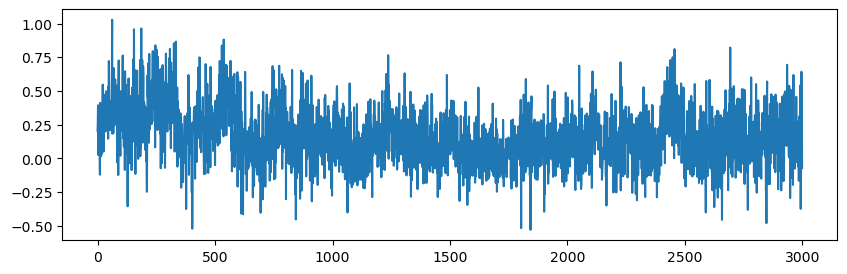

In [144]:
plt.figure(figsize=(10,3))
plt.plot(np.nanmean(ftr1, axis=1))

# all flies

In [2]:
exptGroups = glob.glob(r'/cup/murthy/Kyle/data/edna/*')

In [3]:
exptGroups.remove('/cup/murthy/Kyle/data/edna/control')

In [4]:
exptGroups

['/cup/murthy/Kyle/data/edna/blind_deaf',
 '/cup/murthy/Kyle/data/edna/deaf',
 '/cup/murthy/Kyle/data/edna/LC31_Kir',
 '/cup/murthy/Kyle/data/edna/AD_control_BD',
 '/cup/murthy/Kyle/data/edna/vpoEN_Kir',
 '/cup/murthy/Kyle/data/edna/AD_control',
 '/cup/murthy/Kyle/data/edna/blind']

In [10]:
def load_feature(filepath,ftr, remove_outliers = False, outlier_limit = None, fill=False):

    with h5py.File(filepath, 'r') as f:
        feature = np.array(f[ftr])
    if remove_outliers:
        idxs = np.where(abs(feature)>outlier_limit)[0]
        feature[idxs] = np.nan
    if fill:
        feature = features.fill_missing(feature)
    return feature

In [92]:
ftrlist = ['fFV','fLV','fRS','fmAng',
           'mFV','mLV','mRS','mfAng',
           'mfDist','mfDist_mHead_fAbd',
           'pulse', 'sine']

speedLimit = 50 # mm/s
speedLimit = speedLimit *30/150 # px/frame

window = 10 # seconds
window = window*150 #frames

df = pd.DataFrame(columns=['group', 'fly', 'ftr', 'window'])

for groupDir in exptGroups:
    group = os.path.basename(groupDir)
    print("GROUP: ", group)
    exptList = glob.glob(os.path.join(groupDir, '2*'))
    for exptDir in exptList:
        fly = os.path.basename(exptDir)
        print("FLY: ", fly)
        ftrfile = os.path.join(exptDir, fly+'.h5')
        try:
            oeStarts = load_feature(ftrfile, 'oeStarts')
        except KeyError:
            print("OE doesnt exist in : ", exptDir)
            continue
        for ftr in ftrlist:
            if ftr.endswith('V') or ftr.endswith('S'):
                remove_outliers=True
                outlier_limit = speedLimit
            else:
                remove_outliers = False
                outlier_limit = None
            feature = load_feature(ftrfile, ftr, remove_outliers=remove_outliers, outlier_limit=outlier_limit)
            for oe in oeStarts:
                if oe<window or len(feature)-oe<window: # make sure we are in range
                    continue
                idxrange = range(oe-window, oe+window)

                df.loc[len(df.index)] = [group, fly, ftr, feature[idxrange]]


GROUP:  blind_deaf
FLY:  220806_130552_18159112_rig3_2
FLY:  220805_105022_18159112_rig3_2
FLY:  220805_104628_18159206_rig1_2
FLY:  220805_154352_18159211_rig1_1
FLY:  220806_142916_18159211_rig1_1
FLY:  220806_153012_18159211_rig1_1
FLY:  220802_110135_16276625_rig2_1
FLY:  220805_144306_18159203_rig3_1
FLY:  220806_134511_18159203_rig3_1
FLY:  220805_105022_18159203_rig3_1
FLY:  220804_133513_18159206_rig1_2
FLY:  220806_134511_18159112_rig3_2
FLY:  220809_150036_18159112_rig3_2
FLY:  220805_104835_18159111_rig2_2
FLY:  220805_104628_18159211_rig1_1
FLY:  220809_145748_18159111_rig2_2
FLY:  220805_144306_18159112_rig3_2
FLY:  220805_154352_18159206_rig1_2
FLY:  220806_125743_18159111_rig2_2
FLY:  220805_144143_18159111_rig2_2
FLY:  220804_133650_16276625_rig2_1
FLY:  220809_150036_18159203_rig3_1
FLY:  220806_153012_18159206_rig1_2
FLY:  220806_125416_18159206_rig1_2
FLY:  220809_145315_18159206_rig1_2
FLY:  220809_145315_18159211_rig1_1
FLY:  220805_144143_16276625_rig2_1
FLY:  220

In [93]:
manipulated = ['blind', 'blind_deaf', 'deaf', 'AD_control_BD']
silenced = ['AD_control', 'LC31_Kir', 'vpoEN_Kir']

manipulatedDF = pd.DataFrame(columns=['group', 'ftr', 'avg', 'sem'])
silencedDF = pd.DataFrame(columns=['group', 'ftr', 'avg', 'sem'])

for group in df.group.unique():
    groupDF = df[df.group==group]
    for ftr in ftrlist:
        ftrarr = np.stack(groupDF[groupDF.ftr==ftr]['window'].to_numpy()).T
        ftravg = np.nanmean(ftrarr, axis=1)
        ftrsem = scipy.stats.sem(ftrarr, axis=1, nan_policy='omit').data

        if group in manipulated:
            manipulatedDF.loc[len(manipulatedDF.index)] = [group, ftr, ftravg, ftrsem]
        elif group in silenced:
            silencedDF.loc[len(silencedDF.index)] = [group, ftr, ftravg, ftrsem]
        else:
            print("error")


In [94]:
colors = {'blind':'deepskyblue', 'blind_deaf':'magenta', 'deaf':'forestgreen', 'AD_control_BD':'k', 'AD_control':'k', 'LC31_Kir':'deepskyblue', 'vpoEN_Kir':'forestgreen'}

In [95]:
plt.style.use("default")

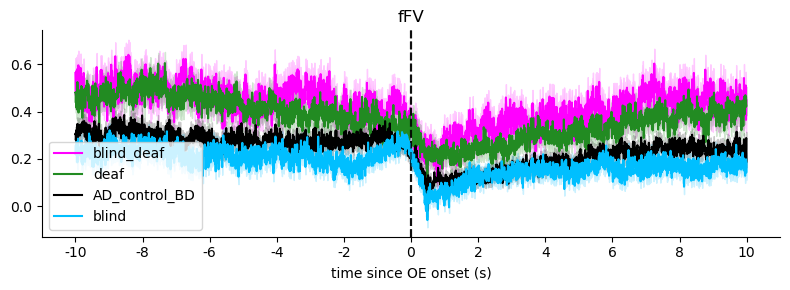

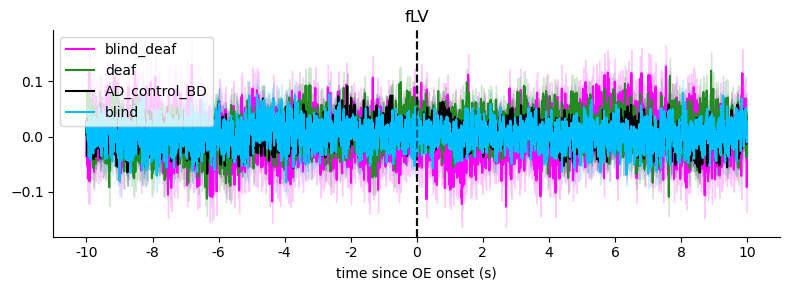

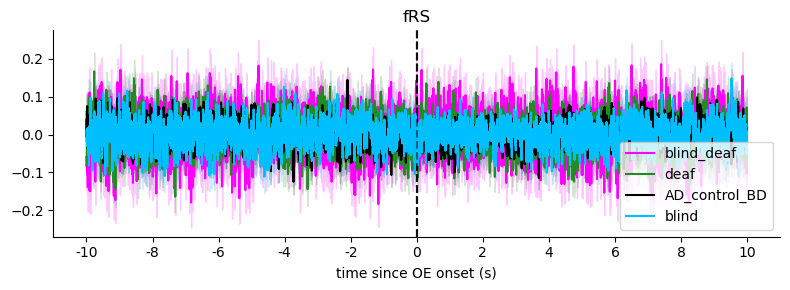

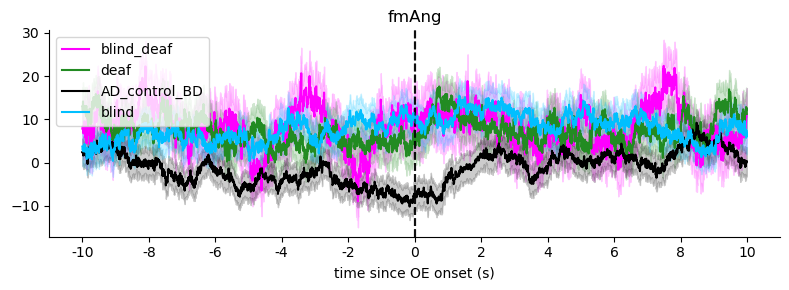

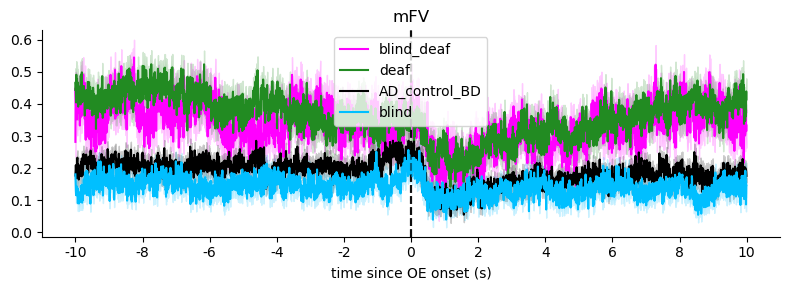

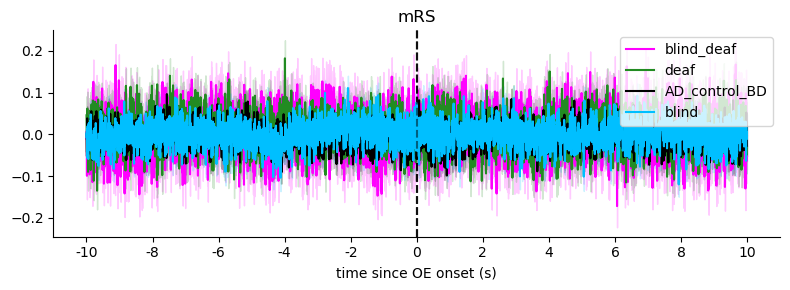

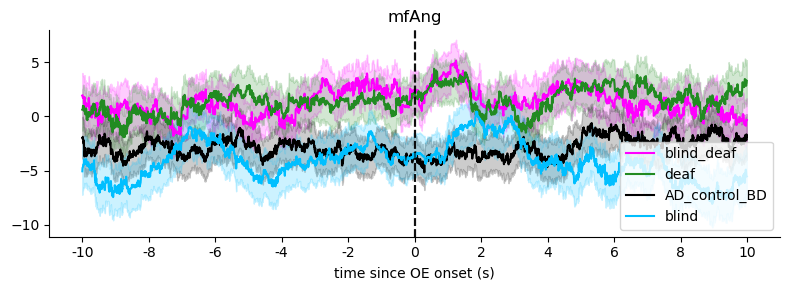

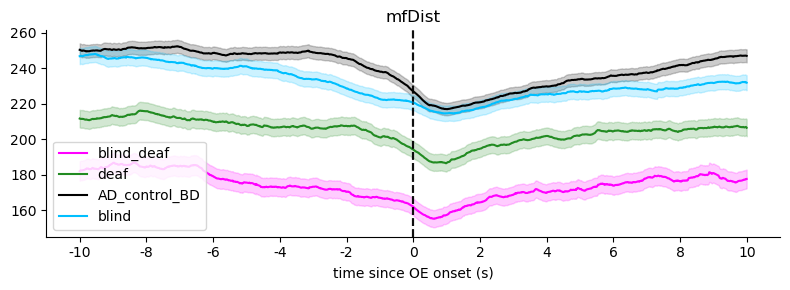

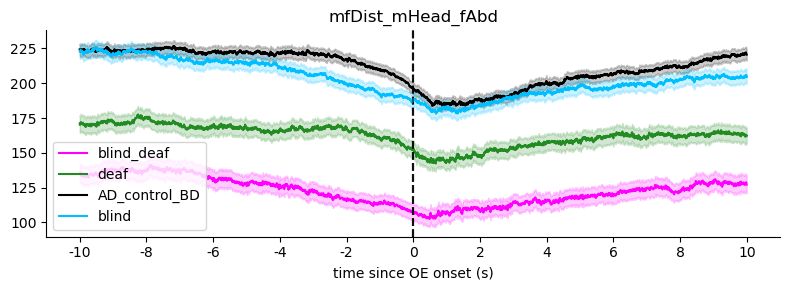

In [96]:
for ftr in ftrlist:
    featureDF = manipulatedDF[manipulatedDF.ftr==ftr]
    plt.figure(figsize=(8,3))
    for group in manipulatedDF.group.unique():
        avg = featureDF[featureDF.group==group]['avg'].to_numpy()[0]
        sem = featureDF[featureDF.group==group]['sem'].to_numpy()[0]
        plt.plot(avg, label=group, color=colors[group])
        plt.fill_between(np.arange(0,len(avg)), avg-sem, avg+sem, alpha=0.2, color=colors[group])
        plt.legend()
        plt.xticks(np.arange(0,len(avg)+1, 300), labels=(np.arange(-len(avg)/2,len(avg)/2+1, 300)/150).astype(int))
        plt.axvline(len(avg)/2, c='k', ls='--', alpha=0.5)
        plt.xlabel('time since OE onset (s)')
        plt.title(ftr)
        sns.despine()
        plt.tight_layout()
        savepath = os.path.join(os.path.dirname(os.path.realpath("")), 'results/featureplots', f'manipulated_{ftr}_10s.pdf')
        plt.savefig(savepath)

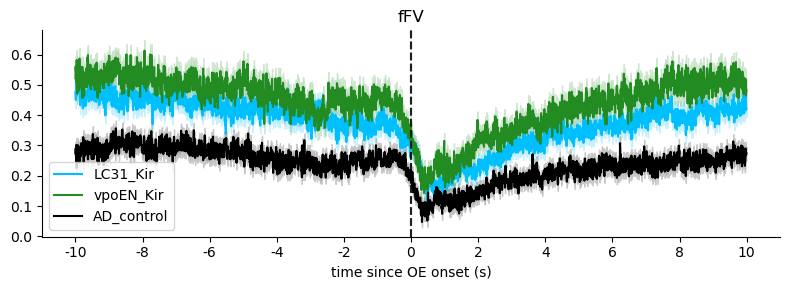

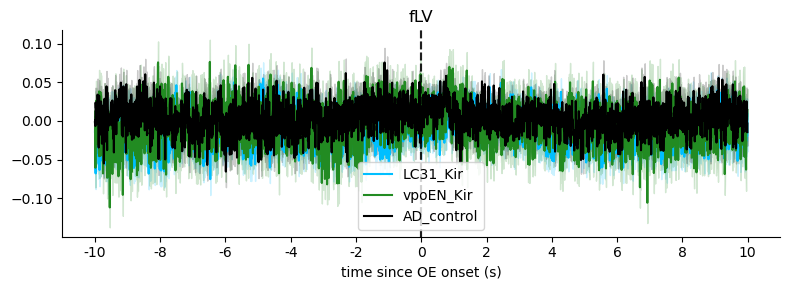

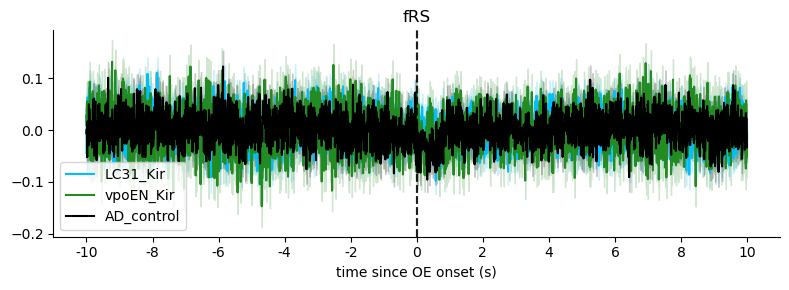

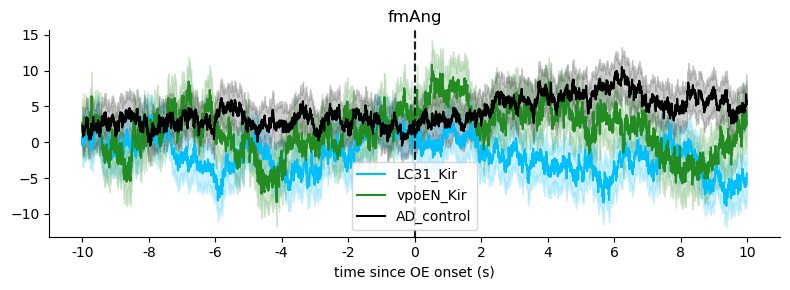

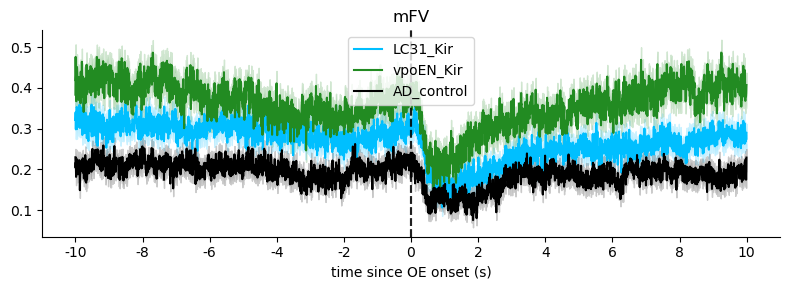

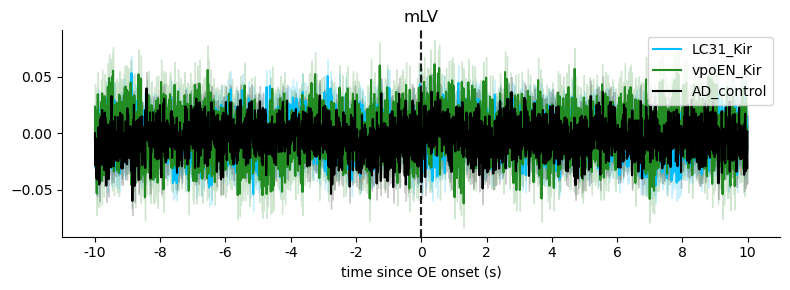

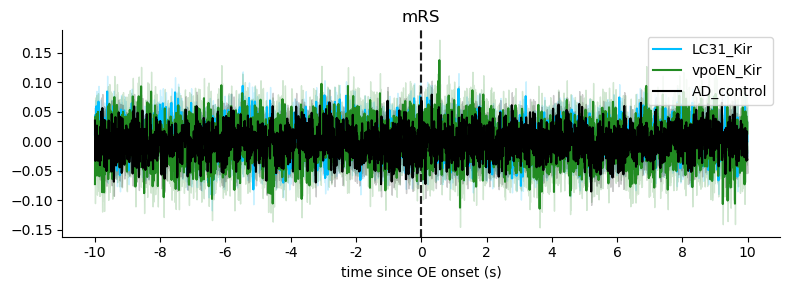

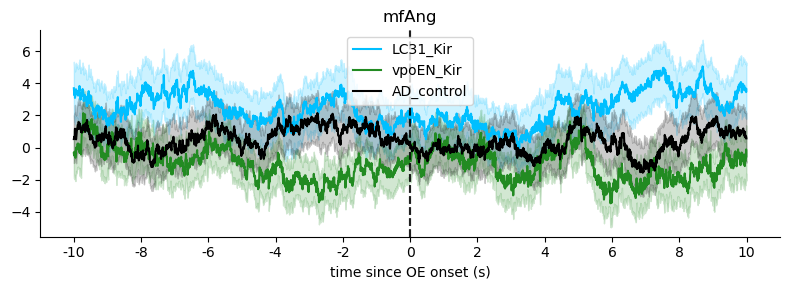

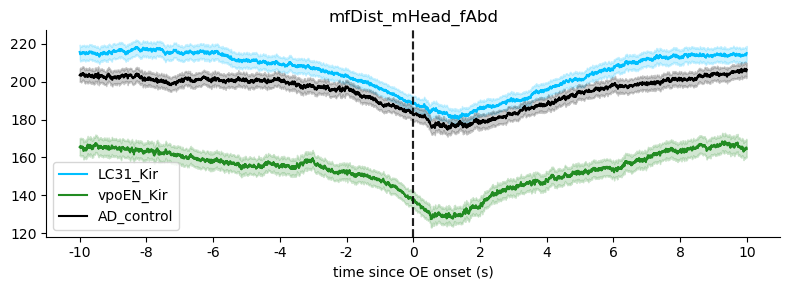

In [97]:
for ftr in ftrlist:
    featureDF = silencedDF[silencedDF.ftr==ftr]
    plt.figure(figsize=(8,3))
    for group in silencedDF.group.unique():
        avg = featureDF[featureDF.group==group]['avg'].to_numpy()[0]
        sem = featureDF[featureDF.group==group]['sem'].to_numpy()[0]
        plt.plot(avg, label=group, color=colors[group])
        plt.fill_between(np.arange(0,len(avg)), avg-sem, avg+sem, alpha=0.2, color=colors[group])
        plt.legend()
        plt.xticks(np.arange(0,len(avg)+1, 300), labels=(np.arange(-len(avg)/2,len(avg)/2+1, 300)/150).astype(int))
        plt.axvline(len(avg)/2, c='k', ls='--', alpha=0.5)
        plt.xlabel('time since OE onset (s)')
        plt.title(ftr)
        sns.despine()
        plt.tight_layout()
        savepath = os.path.join(os.path.dirname(os.path.realpath("")), 'results/featureplots', f'silenced_{ftr}_10s.pdf')
        plt.savefig(savepath)

In [101]:
feature_m_DF[feature_m_DF.group==group]['avg']

Series([], Name: avg, dtype: object)

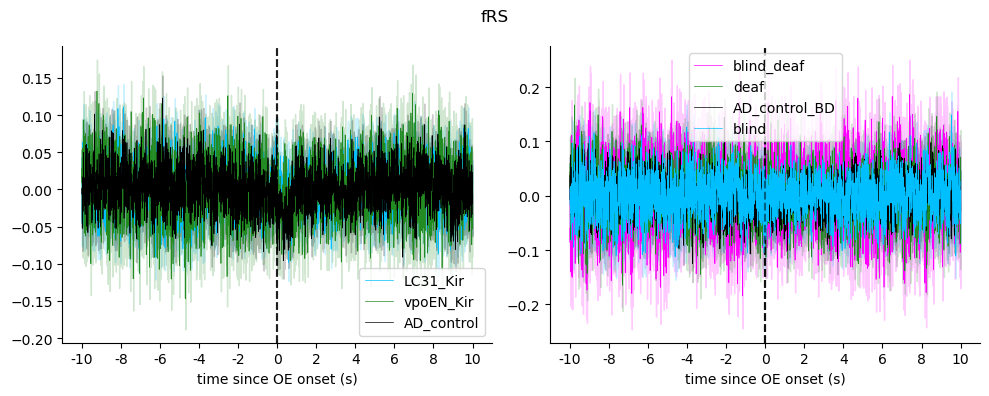

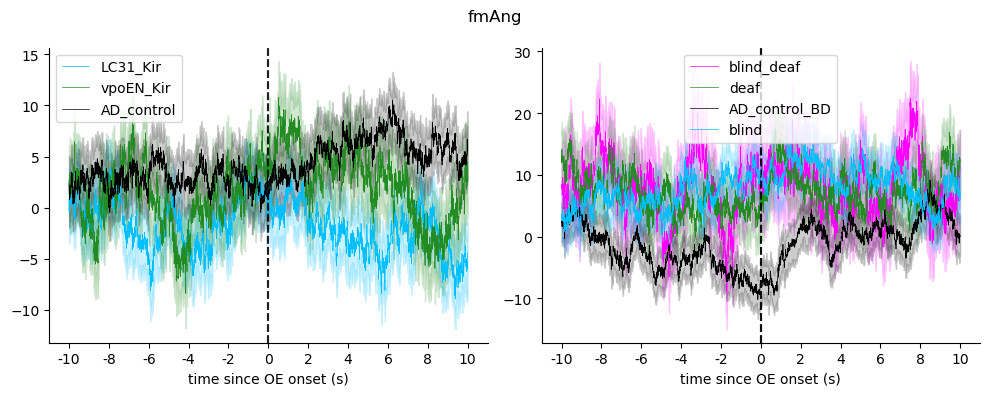

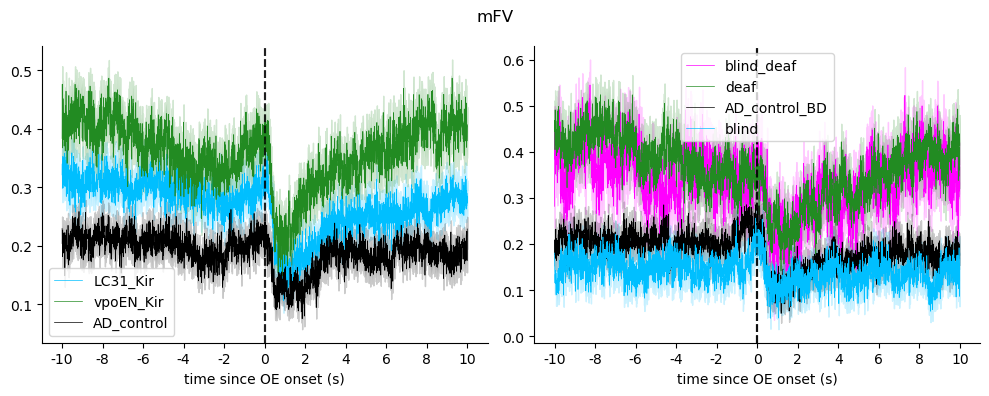

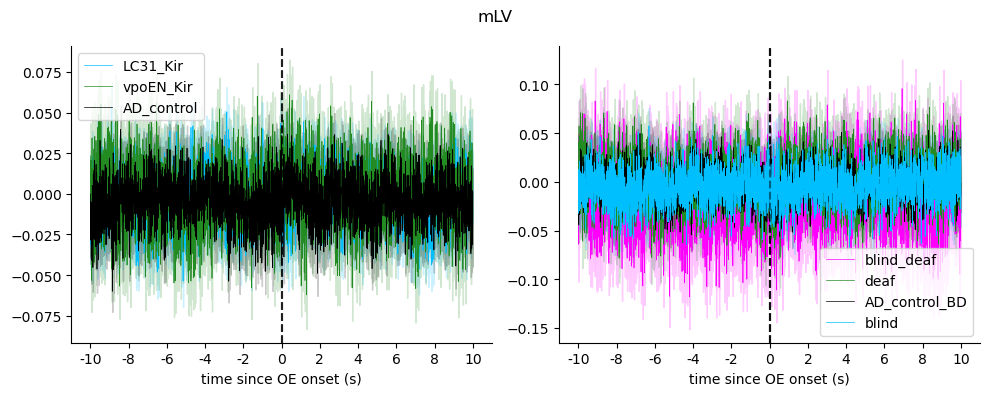

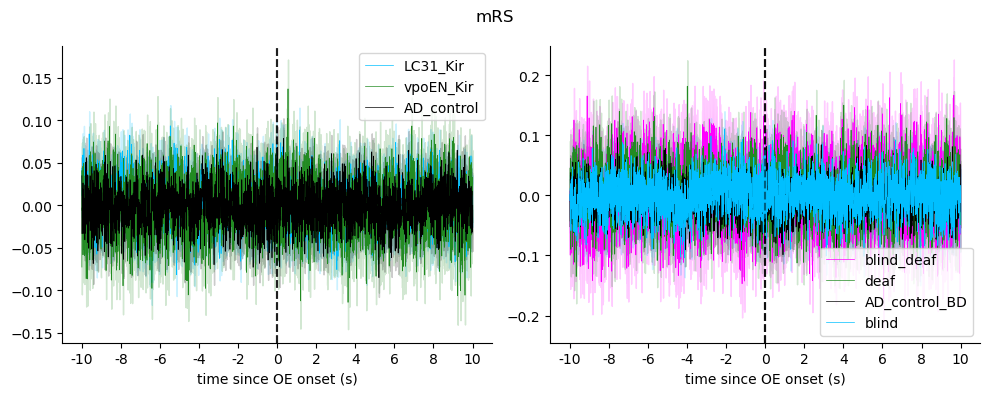

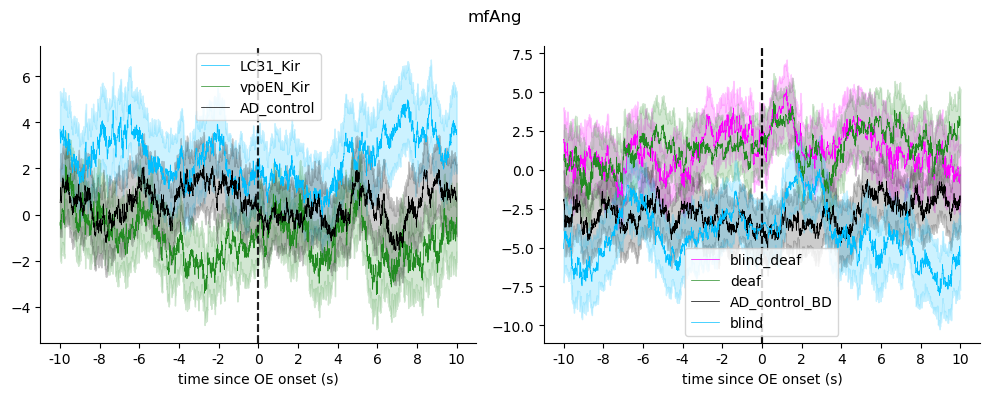

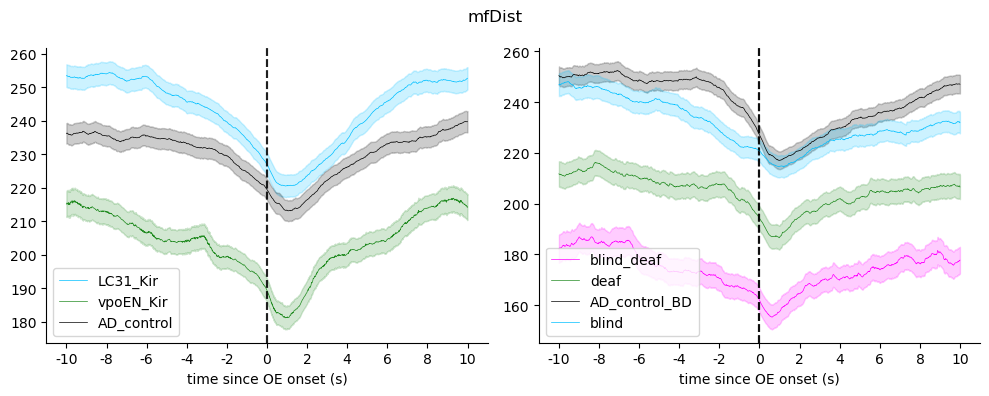

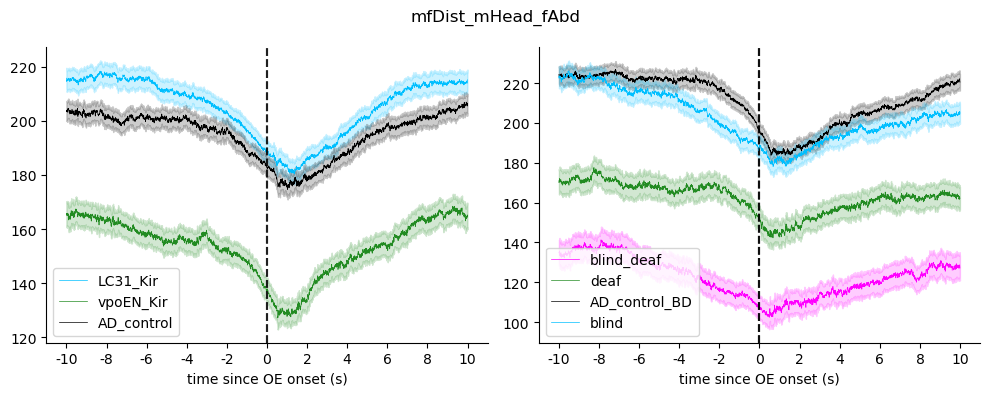

In [111]:
for ftr in ftrlist:
    feature_s_DF = silencedDF[silencedDF.ftr==ftr]
    feature_m_DF = manipulatedDF[manipulatedDF.ftr==ftr]
    fig, axs = plt.subplots(1,2,figsize=(10,4))
    for group in silencedDF.group.unique():
        avg_s = feature_s_DF[feature_s_DF.group==group]['avg'].to_numpy()[0]
        sem_s = feature_s_DF[feature_s_DF.group==group]['sem'].to_numpy()[0]
        axs[0].plot(avg_s, label=group, color=colors[group], lw=0.5)
        axs[0].fill_between(np.arange(0,len(avg_s)), avg_s-sem_s, avg_s+sem_s, alpha=0.2, color=colors[group])
        axs[0].set_xticks(np.arange(0,len(avg_s)+1, 300), labels=(np.arange(-len(avg_s)/2,len(avg_s)/2+1, 300)/150).astype(int))
        axs[0].axvline(len(avg_s)/2, c='k', ls='--', alpha=0.5)
        axs[0].set_xlabel('time since OE onset (s)')
        axs[0].legend()
    for group in manipulatedDF.group.unique():
        avg_m = feature_m_DF[feature_m_DF.group==group]['avg'].to_numpy()[0]
        sem_m = feature_m_DF[feature_m_DF.group==group]['sem'].to_numpy()[0]
        axs[1].plot(avg_m, label=group, color=colors[group], lw=0.5)
        axs[1].fill_between(np.arange(0,len(avg_m)), avg_m-sem_m, avg_m+sem_m, alpha=0.2, color=colors[group])
        axs[1].set_xticks(np.arange(0,len(avg_m)+1, 300), labels=(np.arange(-len(avg_m)/2,len(avg_m)/2+1, 300)/150).astype(int))
        axs[1].axvline(len(avg_m)/2, c='k', ls='--', alpha=0.5)
        axs[1].set_xlabel('time since OE onset (s)')
        axs[1].legend()
    plt.suptitle(ftr)

    sns.despine()
    plt.tight_layout()
    savepath = os.path.join(os.path.dirname(os.path.realpath("")), 'results/featureplots', f"combined_{ftr}_10s.pdf")
    plt.savefig(savepath)
    # break

In [5]:
from scripts import plot_features

In [20]:

def load_songftr(songpath, ftrpath, ftr):

    if not ftr.endswith('StEn'):
        ftr = ftr+'StEn'
    with h5py.File(songpath, 'r') as f:
        featureStEn = np.array(f[ftr])
    with h5py.File(ftrpath, 'r') as f:
        frame_at_sample = np.array(f['frame_at_sample'])
        trxM = np.array(f['trxM'])

    lastframe = len(trxM)
    feature = np.zeros(lastframe)
    if len(featureStEn)==0:
        return feature

    featureStEn = frame_at_sample[featureStEn].astype(int)
    for st, en in featureStEn:
        feature[st:en] = 1

    return feature

In [22]:
exptGroups = glob.glob(r'/cup/murthy/Kyle/data/edna/*')
exptGroups.remove('/cup/murthy/Kyle/data/edna/control')
df = pd.DataFrame(columns=['group', 'fly', 'ftr', 'window'])
window = plot_features.window

for groupDir in exptGroups:
    group = os.path.basename(groupDir)
    if group=='blind_deaf':continue
    print("GROUP: ", group)
    exptList = glob.glob(os.path.join(groupDir, '2*'))
    for exptDir in exptList:
        fly = os.path.basename(exptDir)
        print("FLY: ", fly)
        ftrfile = os.path.join(exptDir, fly + '.h5')
        songfile = os.path.join(exptDir, fly+'_song.h5')
        if not os.path.exists(ftrfile) or not os.path.exists(songfile):
            continue
        try:
            oeStarts = load_feature(ftrfile, 'oeStarts')
        except KeyError:
            print("OE doesnt exist in : ", exptDir)
            continue
        for ftr in plot_features.ftrlist:
            if ftr.endswith('V') or ftr.endswith('S'):
                remove_outliers = True
                outlier_limit = plot_features.speedLimit
            else:
                remove_outliers = False
                outlier_limit = None
            if ftr != 'pulse' and ftr != 'sine':
                feature = load_feature(ftrfile, ftr, remove_outliers=remove_outliers, outlier_limit=outlier_limit)
            else:
                feature = load_songftr(songfile, ftrfile, ftr+'StEn')

            for oe in oeStarts:
                if oe < window or len(feature) - oe < window:  # make sure we are in range
                    continue
                idxrange = range(oe - window, oe + window)

                df.loc[len(df.index)] = [group, fly, ftr, feature[idxrange]]

GROUP:  deaf
FLY:  220726_144401_18159211_rig1_1
FLY:  220722_135757_18159206_rig1_2
FLY:  220722_112028_18159111_rig2_2
FLY:  220726_111936_18159111_rig2_2
FLY:  220722_140011_18159111_rig2_2
FLY:  220722_093508_18159206_rig1_2
FLY:  220726_115607_18159112_rig3_2
FLY:  220722_140011_16276625_rig2_1
FLY:  220726_103848_16276625_rig2_1
FLY:  220722_094033_16276625_rig2_1
FLY:  220722_140328_18159203_rig3_1
FLY:  220726_122224_18159211_rig1_1
FLY:  220726_104122_18159112_rig3_2
FLY:  220722_140328_18159112_rig3_2
FLY:  220726_123111_18159112_rig3_2
FLY:  220726_111110_18159206_rig1_2
FLY:  220726_111110_18159211_rig1_1
FLY:  220726_130814_18159211_rig1_1
FLY:  220722_094033_18159111_rig2_2
FLY:  220722_111810_18159211_rig1_1
FLY:  220726_114730_18159206_rig1_2
FLY:  220726_122224_18159206_rig1_2
FLY:  220726_123111_18159203_rig3_1
FLY:  220726_130814_18159206_rig1_2
FLY:  220726_112248_18159203_rig3_1
FLY:  220722_143427_18159211_rig1_1
FLY:  220722_102131_18159206_rig1_2
FLY:  220722_09

In [28]:
mRS = load_feature(ftrfile, 'mRS')

(-20.0, 20.0)

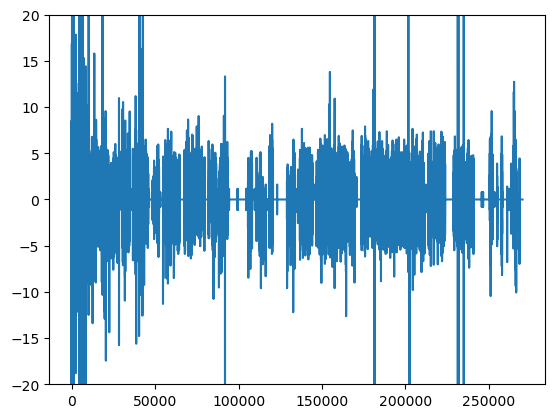

In [29]:
plt.plot(mRS)
plt.ylim(-20,20)

In [ ]:
50*